In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import missingno as msno


In [3]:
df=pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [4]:
df.info

<bound method DataFrame.info of        Activity Period Operating Airline Operating Airline IATA Code  \
0               200507      ATA Airlines                          TZ   
1               200507      ATA Airlines                          TZ   
2               200507      ATA Airlines                          TZ   
3               200507       Air Canada                           AC   
4               200507       Air Canada                           AC   
...                ...               ...                         ...   
15002           201603    Virgin America                          VX   
15003           201603    Virgin America                          VX   
15004           201603    Virgin America                          VX   
15005           201603   Virgin Atlantic                          VS   
15006           201603   Virgin Atlantic                          VS   

      Published Airline Published Airline IATA Code    GEO Summary GEO Region  \
0          ATA Airline

In [5]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [6]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [11]:
df['Adjusted Passenger Count'].describe()

count     15007.000000
mean      29331.917105
std       58284.182219
min           1.000000
25%        5495.500000
50%        9354.000000
75%       21182.000000
max      659837.000000
Name: Adjusted Passenger Count, dtype: float64

In [12]:
df['Passenger Count'].describe()

count     15007.000000
mean      29240.521090
std       58319.509284
min           1.000000
25%        5373.500000
50%        9210.000000
75%       21158.500000
max      659837.000000
Name: Passenger Count, dtype: float64

In [13]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 143.33it/s]


<AxesSubplot:>

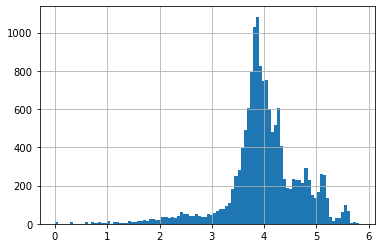

In [14]:
np.log10(df['Passenger Count']).hist(bins=100)

<AxesSubplot:>

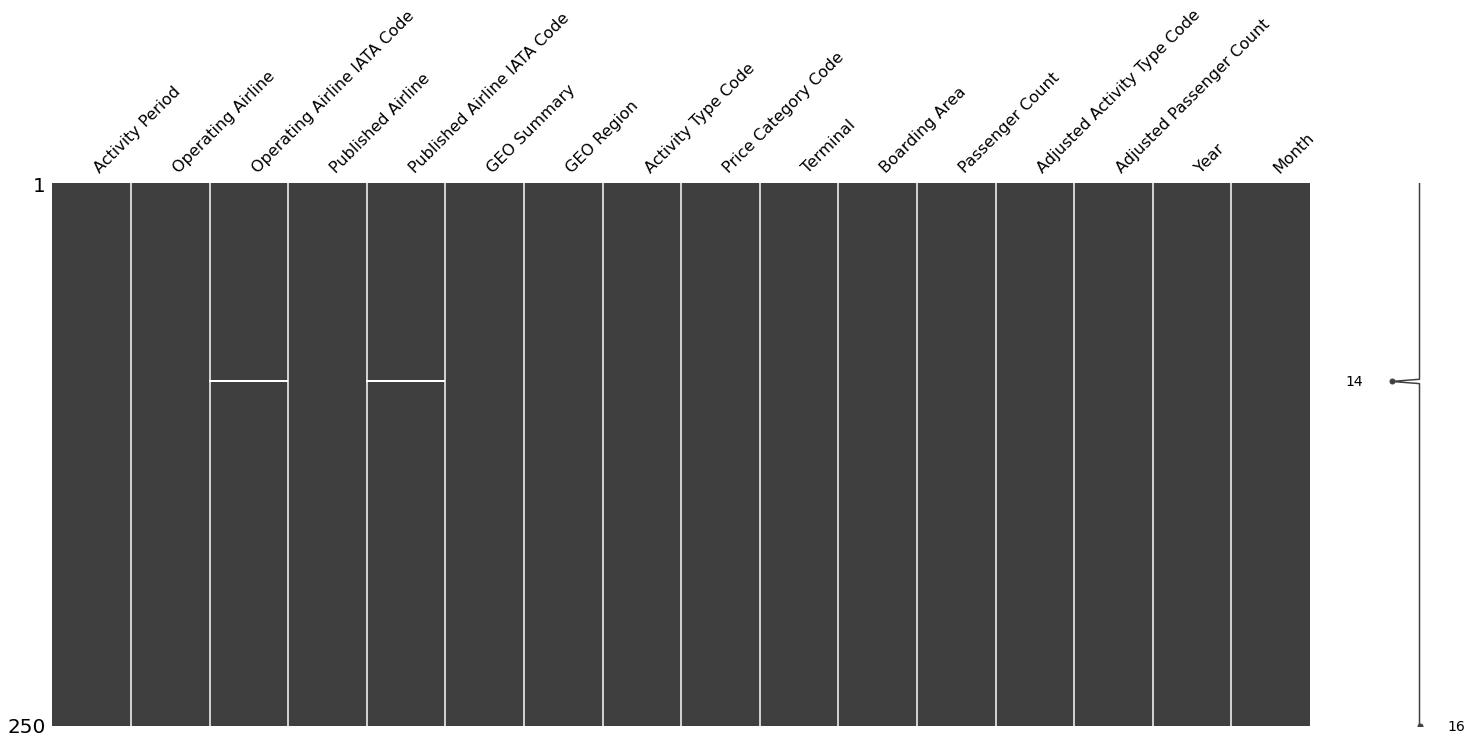

In [17]:
msno.matrix(df.sample(250))

In [18]:
df['Operating_Airline_cat']=df['Operating Airline'].factorize()[0]

In [19]:
df['Operating_Airline_cat'].describe()

count    15007.000000
mean        28.983941
std         17.112876
min          0.000000
25%         15.000000
50%         33.000000
75%         38.000000
max         76.000000
Name: Operating_Airline_cat, dtype: float64

In [21]:
df['Operating_Airline_cat'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76], dtype=int64)

In [25]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month', 'Operating_Airline_cat'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

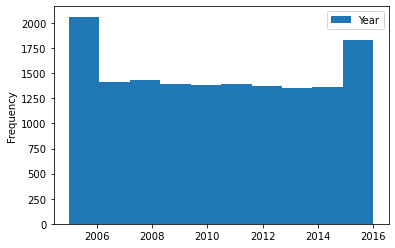

In [38]:
df.plot(x='Passenger Count', y='Year',kind='hist')
